# Data analysis
This jupyter notebook will quanitfy and analyze the alpha generated by different actively managed mutual funds.  These mutual funds were chosen through a process that Richard will detail.

The goal of the project is two-fold.
- Determine the portion of returns for a given strategy that arises from exposure to various market or systematic risk factors
- Identify and quanityf the 'idiosyncratic alpha'

# Setup

In [1]:
from tools import get_mutual_fund_data, get_bond_data, get_ff_data, get_index_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from data_tools import capm, ff_3, ff_5, reg_date_range, capm_index, corr_index
from ind_data_tools import data_analyze_strat_base, data_analyze_strat_bench, data_analyze_strat_5

Total number of categories 20
Total number of funds: 1698

Mutual Fund Data


c:\Users\dklro\Documents\Fall 2023\15.433\15-4331-final-project\tools.py:129: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/mutual_funds/mutual_fund_data.csv",skiprows=0).dropna(how='any')


Total number of rows: 408031
Total number of funds with enough data: 1608
Funds with no data: 25
Funds with less than 5 years of data: 65
Columns: Index(['ticker', 'date', 'total_net_assets', 'total_returns',
       'net_asset_value', 'nav_return'],
      dtype='object')

Mutual Fund Data


c:\Users\dklro\Documents\Fall 2023\15.433\15-4331-final-project\tools.py:129: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/mutual_funds/mutual_fund_data.csv",skiprows=0).dropna(how='any')


Total number of rows: 408031
Total number of funds with enough data: 1608
Funds with no data: 25
Funds with less than 5 years of data: 65
Columns: Index(['ticker', 'date', 'total_net_assets', 'total_returns',
       'net_asset_value', 'nav_return'],
      dtype='object')

FF Data
          date  Mkt-RF   SMB   HML   RMW   CMA    RF
0   1963-07-31   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1   1963-08-31    5.07 -0.80  1.80  0.36 -0.35  0.25
2   1963-09-30   -1.57 -0.52  0.13 -0.71  0.29  0.27
3   1963-10-31    2.53 -1.39 -0.10  2.80 -2.01  0.29
4   1963-11-30   -0.85 -0.88  1.75 -0.51  2.24  0.27
..         ...     ...   ...   ...   ...   ...   ...
719 2023-06-30    6.46  1.34 -0.26  2.18 -1.62  0.40
720 2023-07-31    3.21  2.86  4.11 -0.57  0.57  0.45
721 2023-08-31   -2.39 -3.65 -1.06  3.43 -2.37  0.45
722 2023-09-30   -5.24 -1.80  1.52  1.86 -0.83  0.43
723 2023-10-31   -3.18 -4.03  0.19  2.47 -0.66  0.47

[724 rows x 7 columns]

Bond Data
Columns: Index(['date', '30 Year Bond Return', '

In [2]:
pd.set_option('display.max_rows', 10)

## Import data
First, we import data using the tools that Richard wrote.  This allows us to get mutual fund data in a dictionary.  In addition, we also want FF factors and CAPM factors to do some basic analysis

In [51]:
np.mean(us_eq_alphas_c)

-0.48851661524759354

In [3]:
mf_dict = get_mutual_fund_data()
ff_df = get_ff_data()
bond_df = get_bond_data()
index_dict = get_index_data()


Mutual Fund Data


c:\Users\dklro\Documents\Fall 2023\15.433\15-4331-final-project\tools.py:129: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/mutual_funds/mutual_fund_data.csv",skiprows=0).dropna(how='any')


Total number of rows: 408031
Total number of funds with enough data: 1608
Funds with no data: 25
Funds with less than 5 years of data: 65
Columns: Index(['ticker', 'date', 'total_net_assets', 'total_returns',
       'net_asset_value', 'nav_return'],
      dtype='object')

FF Data
          date  Mkt-RF   SMB   HML   RMW   CMA    RF
0   1963-07-31   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1   1963-08-31    5.07 -0.80  1.80  0.36 -0.35  0.25
2   1963-09-30   -1.57 -0.52  0.13 -0.71  0.29  0.27
3   1963-10-31    2.53 -1.39 -0.10  2.80 -2.01  0.29
4   1963-11-30   -0.85 -0.88  1.75 -0.51  2.24  0.27
..         ...     ...   ...   ...   ...   ...   ...
719 2023-06-30    6.46  1.34 -0.26  2.18 -1.62  0.40
720 2023-07-31    3.21  2.86  4.11 -0.57  0.57  0.45
721 2023-08-31   -2.39 -3.65 -1.06  3.43 -2.37  0.45
722 2023-09-30   -5.24 -1.80  1.52  1.86 -0.83  0.43
723 2023-10-31   -3.18 -4.03  0.19  2.47 -0.66  0.47

[724 rows x 7 columns]

Bond Data
Columns: Index(['date', '30 Year Bond Return', '

In [4]:
len(mf_dict)

1608

## Data set
Let us first take a look at our data set to see what we are working with.  We are only working with actively managed funds and primarily those with the largest AUM.

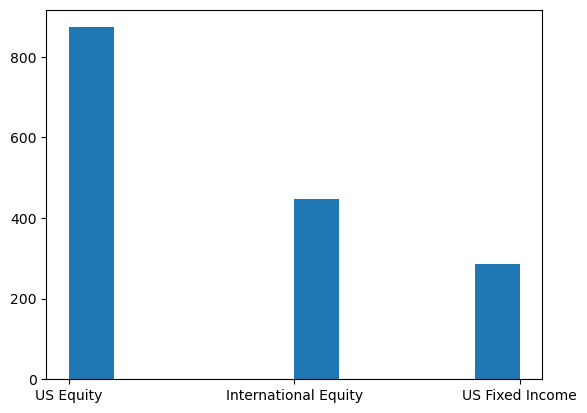

In [5]:
mf_types = list(mf_dict.keys())
mf_areas = [arr[1] for arr in mf_types]
plt.hist(mf_areas)
plt.show()

### Example df below

In [6]:
mf_dict[mf_types[10]]

,ticker,date,total_net_assets,total_returns,net_asset_value,nav_return
0,LBSCX,2002-12-31,0.100,-0.043162,8.4900000,NaN
1,LBSCX,2003-01-31,0.100,-0.029446,8.2400000,-0.029446
2,LBSCX,2003-02-28,0.100,-0.055825,7.7800000,-0.055825
3,LBSCX,2003-03-31,0.200,0.001303,7.7800000,0.000000
4,LBSCX,2003-04-30,0.200,0.073265,8.3500000,0.073265
...,...,...,...,...,...,...
245,LBSCX,2023-05-31,1231.500,-0.029601,27.2100000,-0.029601
246,LBSCX,2023-06-30,1290.600,0.058508,28.7300000,0.055862
247,LBSCX,2023-07-31,1326.400,0.034807,29.7300000,0.034807
248,LBSCX,2023-08-31,1284.600,-0.022200,29.0700000,-0.022200


# US Equity
First, let us look at those actively managed US equity funds

## Get US Equity Data specifically

In [7]:
mf_types = list(mf_dict.keys())
us_eq_data = {k[2]:[] for k in mf_dict.keys() if 'US Equity' in k}

for mf_key, mf_val in mf_dict.items():
    if mf_key[2] in us_eq_data.keys():
        us_eq_data[mf_key[2]].append(mf_val)

for idx, val in enumerate(us_eq_data['Mid-Cap Growth']):
    if val['ticker'].iloc[0] == 'DEEVX':
        del us_eq_data['Mid-Cap Growth'][idx]

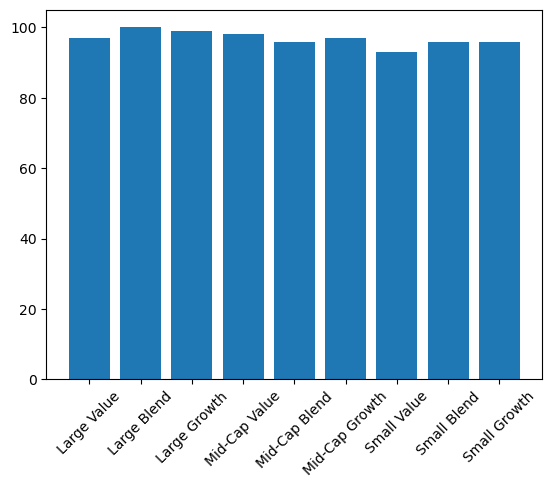

In [8]:
us_amount = [len(arr) for arr in us_eq_data.values()]
plt.bar(us_eq_data.keys(), us_amount)
plt.xticks(rotation=45)
plt.show()

## Example CAPM

MRGRX


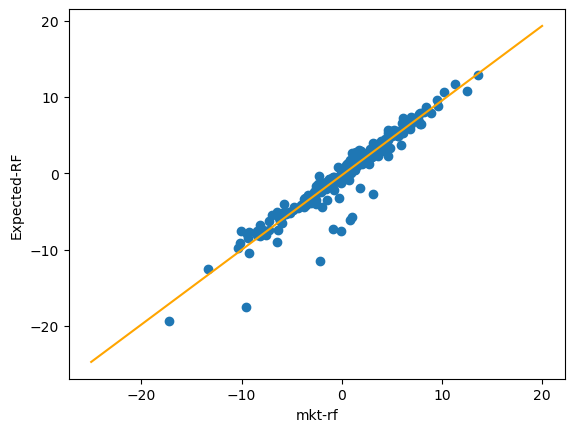

In [9]:
ex_data = us_eq_data['Large Blend'][50]
print(ex_data['ticker'].iloc[0])
results = capm(ex_data, ff_df)

start_date = ff_df['date'][0] if ff_df['date'][0] > ex_data['date'][1] else ex_data['date'][1]
end_date = ex_data['date'].iloc[-1]
temp_ff = ff_df[(ff_df['date'] >= start_date) & (ff_df['date'] <= end_date)].reset_index().drop('index', axis=1)
ex_data = ex_data[(ex_data['date'] >= start_date) & (ex_data['date'] <= end_date)].reset_index().drop('index', axis=1)
plt.scatter(temp_ff['Mkt-RF'], ex_data['nav_return']*100 - temp_ff['RF'])
plt.ylabel('Expected-RF')
plt.xlabel('mkt-rf')

x = np.linspace(-25, 20, 10)
plt.plot(x, results['const'] + results['Mkt-RF']*x, c='orange')

In [10]:
x = sm.add_constant(temp_ff['Mkt-RF'])
y = ex_data['nav_return']*100-temp_ff['RF']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2794.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          1.92e-144
Time:                        04:31:20   Log-Likelihood:                -475.16
No. Observations:                 272   AIC:                             954.3
Df Residuals:                     270   BIC:                             961.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2536      0.085     -2.977      0.003      -0.421      -0.086
Mkt-RF         0.9777      0.018     52.863      0.000       0.941       1.014
==============================================================================
Omnibus:                      237.395   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3829.488
Skew:                          -3.593   Prob(JB):                         0.00
Kurtosis:                      19.919   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Averages
This portion focuses on establishing the average values for a grouping of mutual funds

### CAPM
First, we run CAPM on each to find their beta and alpha.  This gives us a good baseline with which to work off of.  

Note that these are run allowing for herteroskedasticity.  They are also run for the full range of dates for now

#### CAPM on all listed companies
F-F data file used here

This takes an average of all mututal fund alpha and betas in a certain category

In [11]:
# Example usage of the capm function
capm(us_eq_data['Large Blend'][0], ff_df)

{'const': -0.4729943515703532, 'Mkt-RF': 0.8108697503318263}

In [12]:
us_eq_alphas_c = []
us_eq_alphas_std_c = []
us_eq_betas_c = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    for ticker in us_eq_data[strat]:
        result = capm(ticker, ff_df)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['Mkt-RF'])
    us_eq_alphas_c.append(np.mean(temp_alpha))
    us_eq_alphas_std_c.append(np.std(temp_alpha))
    us_eq_betas_c.append(np.mean(temp_beta))

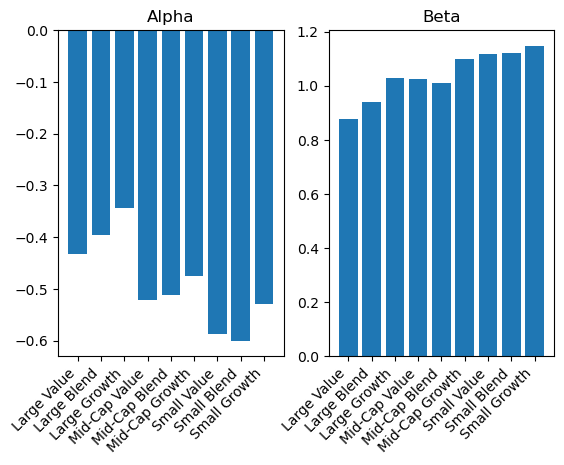

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(us_eq_data.keys(), us_eq_alphas_c)
ax2.bar(us_eq_data.keys(), us_eq_betas_c)
fig.autofmt_xdate(rotation=45)
ax1.set_title('Alpha')
ax2.set_title('Beta')
plt.show()

#### CAPM on benchmark
Here instead we consider the market return as the benchmark index return

This again takes an average of all mutual fund alpha and beta within a category with the market return as benchmark

In [14]:
us_index = {k[2]: v for k, v in index_dict.items() if 'US Equity' in k}

In [15]:
us_idx_alphas_c = []
us_idx_betas_c = []
us_idx_alphas_std_c = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        start_date = start_date if start_date > us_index[strat]['Date'][1] else us_index[strat]['Date'][1]
        end_date = ticker['date'].iloc[-1]
        result = capm_index(ticker, ff_df, us_index[strat], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['beta'])
    us_idx_alphas_c.append(np.mean(temp_alpha))
    us_idx_betas_c.append(np.mean(temp_beta))
    us_idx_alphas_std_c.append(np.std(temp_alpha))

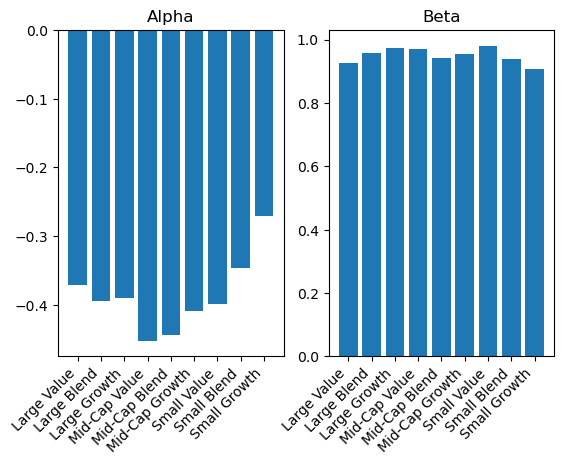

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(us_eq_data.keys(), us_idx_alphas_c)
ax2.bar(us_eq_data.keys(), us_idx_betas_c)
fig.autofmt_xdate(rotation=45)
ax1.set_title('Alpha')
ax2.set_title('Beta')
plt.show()

### FF 3-Factor
This is the 3-factor model including SMB and HML

In [17]:
us_alphas_3 = []
us_betas_3 = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        start_date = start_date if start_date > us_index[strat]['Date'][1] else us_index[strat]['Date'][1]
        end_date = ticker['date'].iloc[-1]
        result = reg_date_range(ticker, ff_df, ['Mkt-RF', 'SMB', 'HML'], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
    us_alphas_3.append(np.mean(temp_alpha))

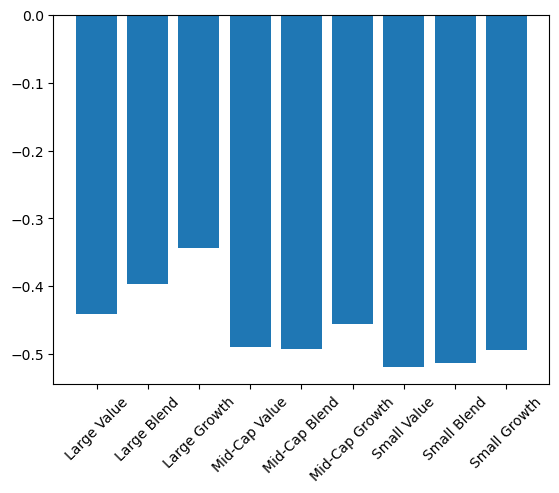

In [18]:
plt.bar(us_eq_data.keys(), us_alphas_3)
plt.xticks(rotation=45)
plt.show()

### FF 5-Factor
This is the 3-factor model including SMB and HML.  RMW and CMA as well

In [19]:
us_alphas_5 = []
us_betas_5 = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        end_date = ticker['date'].iloc[-1]
        result = reg_date_range(ticker, ff_df, ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
    us_alphas_5.append(np.mean(temp_alpha))

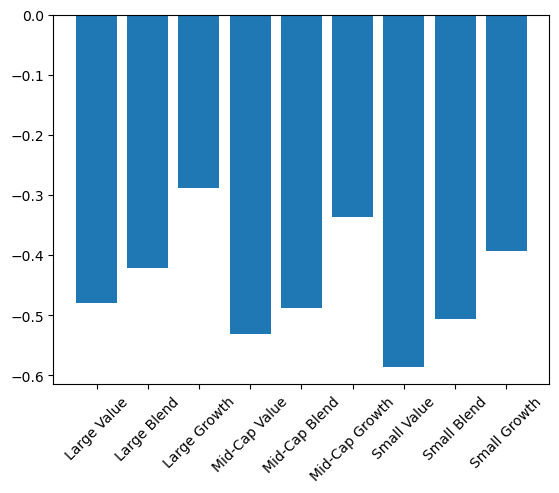

In [20]:
plt.bar(us_eq_data.keys(), us_alphas_5)
plt.xticks(rotation=45)
plt.show()

### Combined bar graph of alpha from FF and CAPM

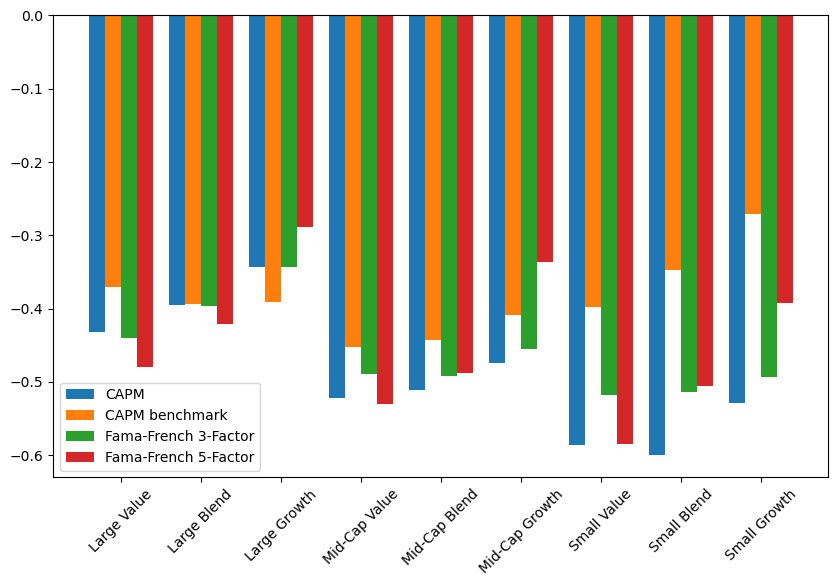

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

idx = np.arange(len(us_eq_data.keys()))


ax.bar(idx-0.3, us_eq_alphas_c, 0.2, label='CAPM')
ax.bar(idx-0.1, us_idx_alphas_c, 0.2, label='CAPM benchmark')
ax.bar(idx+0.1, us_alphas_3, 0.2, label='Fama-French 3-Factor')
ax.bar(idx+0.3, us_alphas_5, 0.2, label='Fama-French 5-Factor')


ax.set_xticks(idx)
ax.set_xticklabels(us_eq_data.keys(), rotation=45)
ax.legend()
plt.show()

### Find results from date range
We can now look at the results from a data range more specifically.  The function below is an example of being able to do that

Probably looking at a date range after GFC and before Covid has the least randomness or impact of systematic risk.  Could do more looking into regions of low vol.

In [22]:
between_alpha = []
gfc_alpha = []
covid_alpha = []
pre_gfc_alpha = []
dotcom_alpha = []
pre_dotcom_alpha = []

for strat in us_eq_data.keys():
    temp_between_alpha=[]
    temp_gfc_alpha = []
    temp_covid_alpha = []
    temp_pre_gfc_alpha = []
    temp_dotcom_alpha = []
    temp_pre_dotcom_alpha = []
    for ticker in us_eq_data[strat]:
        result = reg_date_range(ticker, ff_df, ['Mkt-RF'], '20100101', '20200101')
        if result == None or result['const'] == np.nan:
            pass
        else:
            temp_between_alpha.append(result['const'])

        result = reg_date_range(ticker, ff_df, ['Mkt-RF'], '20071201', '20090601')
        if result == None or result['const'] == np.nan:
            pass
        else:
            temp_gfc_alpha.append(result['const'])

        result = reg_date_range(ticker, ff_df, ['Mkt-RF'], '20200201', '20220101')
        if result == None or result['const'] == np.nan:
            pass
        else:
            temp_covid_alpha.append(result['const'])

        result = reg_date_range(ticker, ff_df, ['Mkt-RF'], '20021001', '20071001')
        if result == None or result['const'] == np.nan:
            pass
        else:
            temp_pre_gfc_alpha.append(result['const'])

        result = reg_date_range(ticker, ff_df, ['Mkt-RF'], '19950101', '20021001')
        if result == None or result['const'] == np.nan:
            pass
        else:
            temp_dotcom_alpha.append(result['const'])

        result = reg_date_range(ticker, ff_df, ['Mkt-RF'], '19850101', '19950101')
        if result == None or result['const'] == np.nan:
            pass
        else:
            if strat == 'Small Value':
                print(result)
            temp_pre_dotcom_alpha.append(result['const'])
    
    between_alpha.append(np.mean(temp_between_alpha))
    gfc_alpha.append(np.mean(temp_gfc_alpha))
    covid_alpha.append(np.mean(temp_covid_alpha))
    pre_gfc_alpha.append(np.mean(temp_pre_gfc_alpha))
    dotcom_alpha.append(np.mean(temp_dotcom_alpha))
    pre_dotcom_alpha.append(np.mean(temp_pre_dotcom_alpha))

c:\Users\dklro\miniconda3\envs\p364b\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dklro\miniconda3\envs\p364b\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


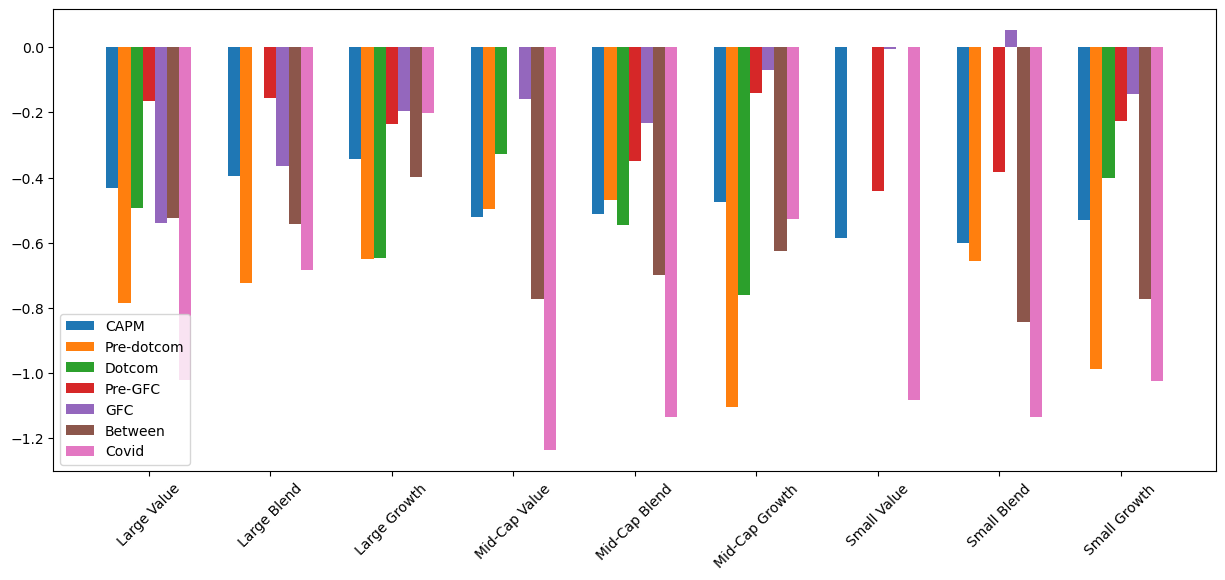

In [23]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

idx = np.arange(len(us_eq_data.keys()))


ax.bar(idx-0.3, us_eq_alphas_c, 0.1, label='CAPM')
ax.bar(idx-0.2, pre_dotcom_alpha, 0.1, label='Pre-dotcom')
ax.bar(idx-0.1, dotcom_alpha, 0.1, label='Dotcom')
ax.bar(idx, pre_gfc_alpha, 0.1, label='Pre-GFC')
ax.bar(idx+0.1, gfc_alpha, 0.1, label='GFC')
ax.bar(idx+0.2, between_alpha, 0.1, label='Between')
ax.bar(idx+0.3, covid_alpha, 0.1, label='Covid')

ax.set_xticks(idx)
ax.set_xticklabels(us_eq_data.keys(), rotation=45)
ax.legend()
plt.show()

### Correlations between MF and benchmark

In [24]:
us_corr = []
for strat in us_eq_data.keys():
    temp_corr=[]
    for ticker in us_eq_data[strat]:
        start_date = ticker['date'][1] if ticker['date'][1] > us_index[strat]['Date'][1] else us_index[strat]['Date'][1]
        end_date = ticker['date'].iloc[-1]
        result = corr_index(ticker, us_index[strat], start_date, end_date)
        if result == None:
            continue
        temp_corr.append(result)
    us_corr.append(np.mean(temp_corr))

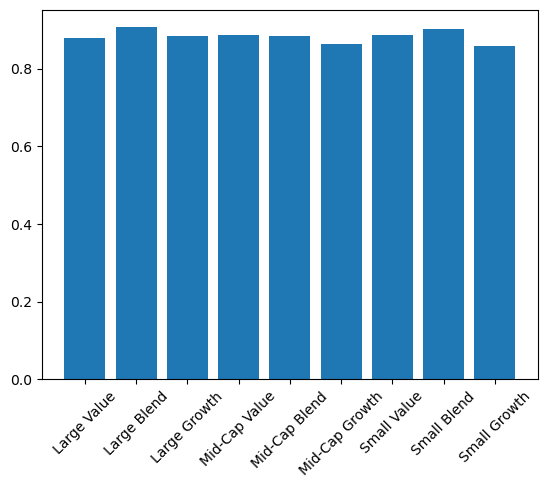

In [25]:
plt.bar(us_eq_data.keys(), us_corr)
plt.xticks(rotation=45)
plt.show()

## Individual strategies

In [26]:
ind_alphas_c = []
ind_betas_c = []
fund_tickers = []

for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    temp_tickers = []
    for ticker in us_eq_data[strat]:
        result = capm(ticker, ff_df)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['Mkt-RF'])
        temp_tickers.append(ticker['ticker'].iloc[0])
    ind_alphas_c.append(temp_alpha)
    ind_betas_c.append(temp_beta)
    fund_tickers.append(temp_tickers)

ind_idx_alphas_c = []
ind_idx_betas_c = []
fund_tickers_idx = []
ind_corr = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    temp_tickers=[]
    temp_corr=[]
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        start_date = start_date if start_date > us_index[strat]['Date'][1] else us_index[strat]['Date'][1]
        end_date = ticker['date'].iloc[-1]
        result = capm_index(ticker, ff_df, us_index[strat], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['beta'])
        temp_tickers.append(ticker['ticker'].iloc[0])
        temp_corr.append(corr_index(ticker, us_index[strat], start_date, end_date))
    ind_idx_alphas_c.append(temp_alpha)
    ind_idx_betas_c.append(temp_beta)
    fund_tickers_idx.append(temp_tickers)
    ind_corr.append(temp_corr)

ind_alphas_5 = []
ind_betas_5 = []
ind_smbs_5 = []
ind_hmls_5 = []
ind_rmws_5 = []
ind_cmas_5 = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    temp_smb = []
    temp_hml = []
    temp_rmw = []
    temp_cma = []
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        end_date = ticker['date'].iloc[-1]
        result = reg_date_range(ticker, ff_df, ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['Mkt-RF'])
        temp_smb.append(result['SMB'])
        temp_hml.append(result['HML'])
        temp_rmw.append(result['RMW'])
        temp_cma.append(result['CMA'])
    ind_alphas_5.append(temp_alpha)
    ind_betas_5.append(temp_beta)
    ind_smbs_5.append(temp_smb)
    ind_hmls_5.append(temp_hml)
    ind_rmws_5.append(temp_rmw)
    ind_cmas_5.append(temp_cma)

### Large value

In [27]:
strat=0
strat_name = 'Large Value'

#### Regular CAPM

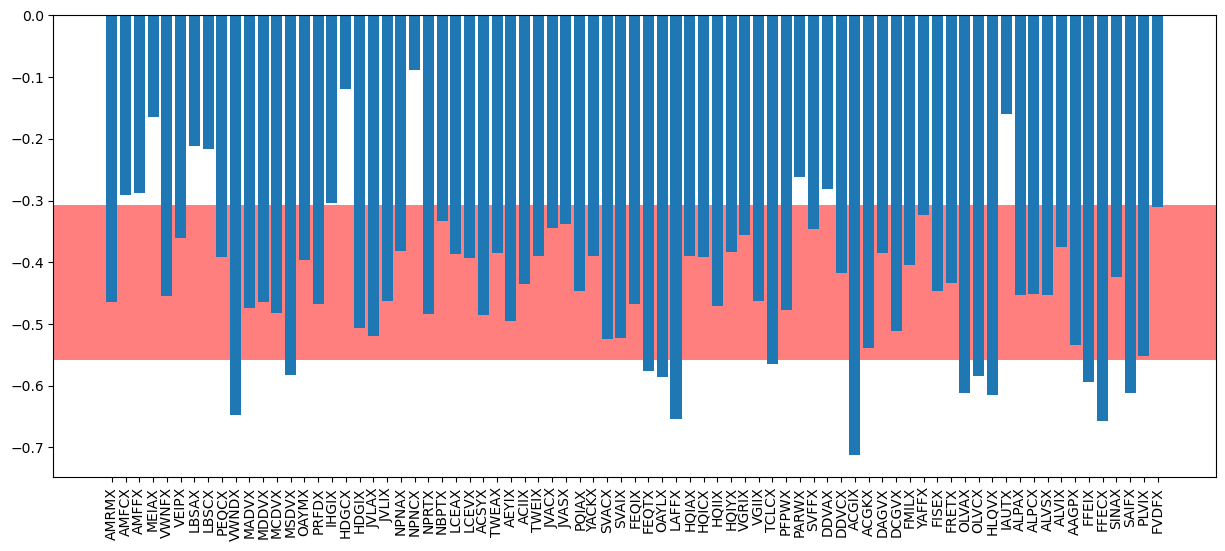

In [28]:
fig = plt.figure(figsize=(15,6))

plt.axhspan(us_eq_alphas_c[strat]-us_eq_alphas_std_c[strat], us_eq_alphas_c[strat]+us_eq_alphas_std_c[strat], facecolor='r', alpha=0.5)
plt.bar(fund_tickers[strat], ind_alphas_c[strat])
plt.xticks(rotation=90)
plt.show()

In [29]:
n=5
largest_index = sorted(range(len(ind_alphas_c[strat])), key = lambda sub: ind_alphas_c[strat][sub])[-n:]
best_alpha_mf = [fund_tickers[strat][i] for i in largest_index]
print(f'The largest alpha funds by CAPM marked to whole market are {best_alpha_mf}.  Note that the best one is last.')

The largest alpha funds by CAPM marked to whole market are ['LBSAX', 'MEIAX', 'IAUTX', 'HDGCX', 'NPNCX'].  Note that the best one is last.


In [30]:
above_std = [idx for idx, val in enumerate(ind_alphas_c[strat]) if val > us_eq_alphas_c[strat]+us_eq_alphas_std_c[strat]]
above_std_mf = [fund_tickers[strat][i] for i in above_std]
print(f'The mutual funds that are 1 stdev above mean with benchmark alpha are {above_std_mf}')

The mutual funds that are 1 stdev above mean with benchmark alpha are ['AMFCX', 'AMFFX', 'MEIAX', 'LBSAX', 'LBSCX', 'IHGIX', 'HDGCX', 'NPNCX', 'PARWX', 'DDVAX', 'IAUTX']


In [31]:
below_std = [idx for idx, val in enumerate(ind_alphas_c[strat]) if val < us_eq_alphas_c[strat]-us_eq_alphas_std_c[strat]]
below_std_mf = [fund_tickers[strat][i] for i in below_std]
print(f'The mutual funds that are 1 stdev below mean with benchmark alpha are {below_std_mf}')

The mutual funds that are 1 stdev below mean with benchmark alpha are ['VWNDX', 'MSDVX', 'FEQTX', 'OAYLX', 'LAFFX', 'TCLCX', 'ACGIX', 'OLVAX', 'OLVCX', 'HLQVX', 'FFEIX', 'FFECX', 'SAIFX']


In [32]:
below_std_beta = [ind_betas_c[strat][i] for i in below_std]
above_std_beta = [ind_betas_c[strat][i] for i in above_std]
print(f'Average beta of below stdev alpha is {np.mean(below_std_beta)} with a stdev on beta of {np.std(below_std_beta)}')
print(f'Average beta of above stdev alpha is {np.mean(above_std_beta)} with a stdev on beta of {np.std(above_std_beta)}')

Average beta of below stdev alpha is 0.9521717152658417 with a stdev on beta of 0.11186015059528046
Average beta of above stdev alpha is 0.8261711233636543 with a stdev on beta of 0.11280703987442978


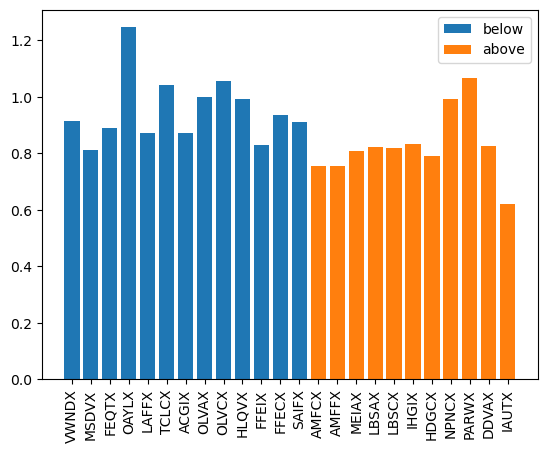

In [33]:
plt.bar(below_std_mf, below_std_beta, label='below')
plt.bar(above_std_mf, above_std_beta, label='above')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Benchmark CAPM

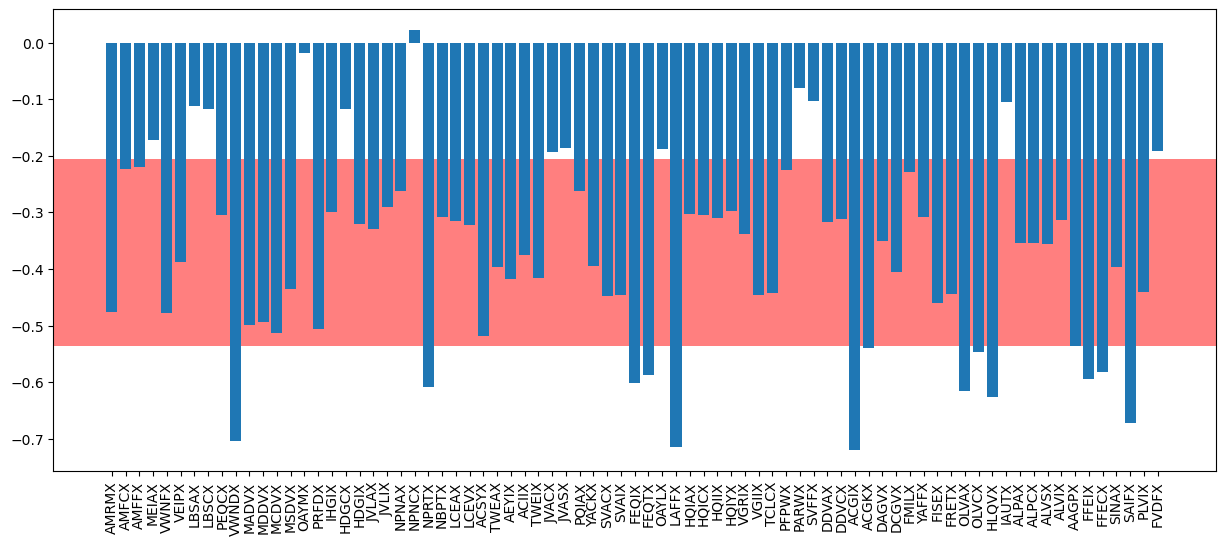

In [34]:
fig = plt.figure(figsize=(15,6))

plt.axhspan(us_idx_alphas_c[strat]-us_idx_alphas_std_c[strat], us_idx_alphas_c[strat]+us_idx_alphas_std_c[strat], facecolor='r', alpha=0.5)
plt.bar(fund_tickers_idx[strat], ind_idx_alphas_c[strat])
plt.xticks(rotation=90)
plt.show()

In [35]:
n=5
largest_index = sorted(range(len(ind_idx_alphas_c[strat])), key = lambda sub: ind_idx_alphas_c[strat][sub])[-n:]
best_alpha_mf = [fund_tickers_idx[strat][i] for i in largest_index]
print(f'The largest alpha funds by CAPM marked to benchmask are {best_alpha_mf}.  Note last one is best one')

The largest alpha funds by CAPM marked to benchmask are ['IAUTX', 'SVFFX', 'PARWX', 'OAYMX', 'NPNCX'].  Note last one is best one


In [36]:
above_std_index = [idx for idx, val in enumerate(ind_idx_alphas_c[strat]) if val > us_idx_alphas_c[strat]+us_idx_alphas_std_c[strat]]
above_std_mf = [fund_tickers_idx[strat][i] for i in above_std_index]
print(f'The mutual funds that are 1 stdev above mean with benchmark alpha are {above_std_mf}')

The mutual funds that are 1 stdev above mean with benchmark alpha are ['MEIAX', 'LBSAX', 'LBSCX', 'OAYMX', 'HDGCX', 'NPNCX', 'JVACX', 'JVASX', 'OAYLX', 'PARWX', 'SVFFX', 'IAUTX', 'FVDFX']


In [37]:
below_std_index = [idx for idx, val in enumerate(ind_idx_alphas_c[strat]) if val < us_idx_alphas_c[strat]-us_idx_alphas_std_c[strat]]
below_std_mf = [fund_tickers_idx[strat][i] for i in below_std_index]
print(f'The mutual funds that are 1 stdev above mean with benchmark alpha are {below_std_mf}')

The mutual funds that are 1 stdev above mean with benchmark alpha are ['VWNDX', 'NPRTX', 'FEQIX', 'FEQTX', 'LAFFX', 'ACGIX', 'ACGKX', 'OLVAX', 'OLVCX', 'HLQVX', 'FFEIX', 'FFECX', 'SAIFX']


In [38]:
below_std_beta = [ind_idx_betas_c[strat][i] for i in below_std_index]
above_std_beta = [ind_idx_betas_c[strat][i] for i in above_std_index]
print(f'Average beta of below stdev alpha is {np.mean(below_std_beta)} with a stdev on beta of {np.std(below_std_beta)}')
print(f'Average beta of above stdev alpha is {np.mean(above_std_beta)} with a stdev on beta of {np.std(above_std_beta)}')

Average beta of below stdev alpha is 0.990536640861027 with a stdev on beta of 0.0637126260348924
Average beta of above stdev alpha is 0.992416202847012 with a stdev on beta of 0.16830835583947118


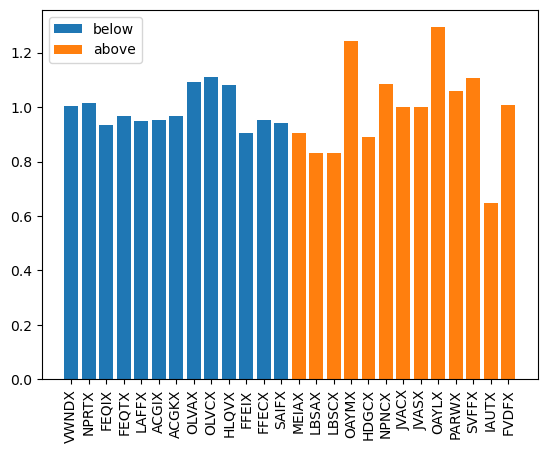

In [39]:
plt.bar(below_std_mf, below_std_beta, label='below')
plt.bar(above_std_mf, above_std_beta, label='above')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [40]:
below_std_corr = [ind_corr[strat][i] for i in below_std_index]
above_std_corr = [ind_corr[strat][i] for i in above_std_index]
print(f'Average corr of below stdev alpha is {np.mean(below_std_corr)} with a stdev on corr of {np.std(below_std_corr)}')
print(f'Average corr of above stdev alpha is {np.mean(above_std_corr)} with a stdev on corr of {np.std(above_std_corr)}')

Average corr of below stdev alpha is 0.8632785705298033 with a stdev on corr of 0.05909926007262963
Average corr of above stdev alpha is 0.8709781249709777 with a stdev on corr of 0.14124593374611236


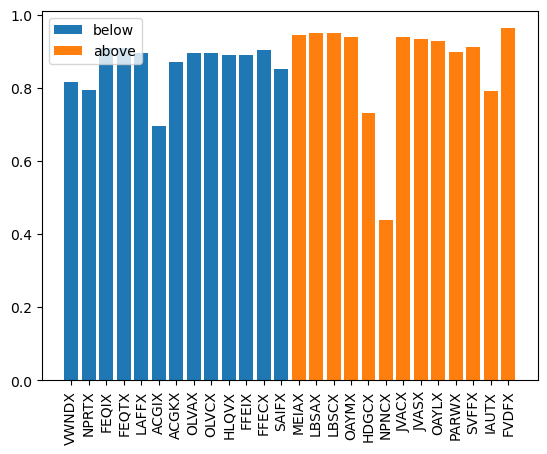

In [41]:
plt.bar(below_std_mf, below_std_corr, label='below')
plt.bar(above_std_mf, above_std_corr, label='above')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### 5-Factor

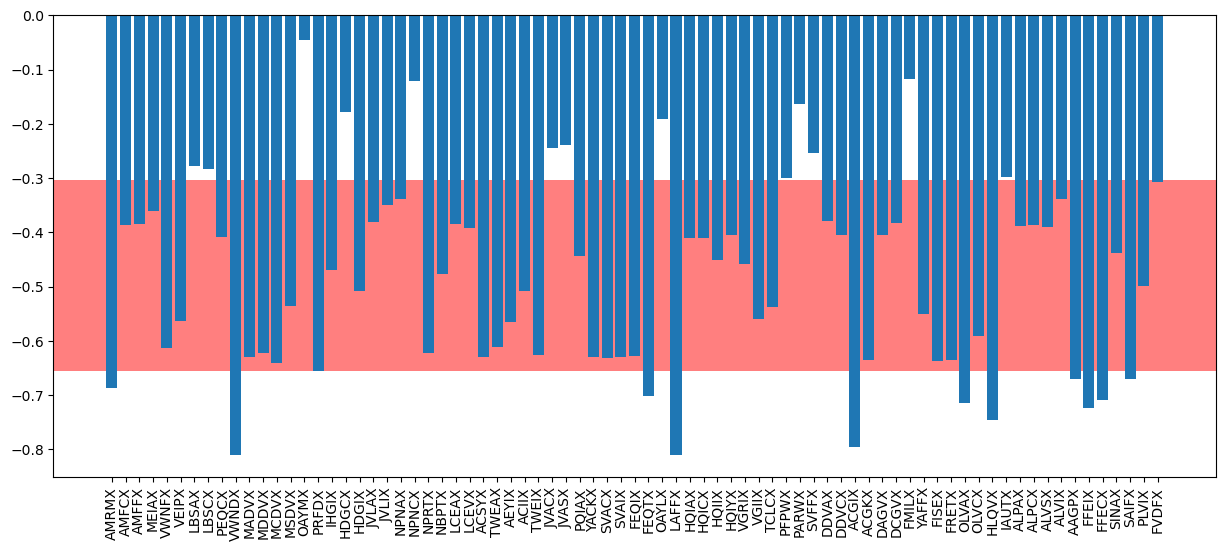

In [42]:
fig = plt.figure(figsize=(15,6))

plt.axhspan(np.mean(ind_alphas_5[strat])-np.std(ind_alphas_5[strat]), np.mean(ind_alphas_5[strat])+np.std(ind_alphas_5[strat]), facecolor='r', alpha=0.5)
plt.bar(fund_tickers[strat], ind_alphas_5[strat])
plt.xticks(rotation=90)
plt.show()

In [43]:
n=5
largest_index = sorted(range(len(ind_alphas_5[strat])), key = lambda sub: ind_alphas_5[strat][sub])[-n:]
best_alpha_mf = [fund_tickers[strat][i] for i in largest_index]
print(f'The largest alpha funds by 5-factor are {best_alpha_mf}.  Note last one is best one')

The largest alpha funds by 5-factor are ['HDGCX', 'PARWX', 'NPNCX', 'FMILX', 'OAYMX'].  Note last one is best one


In [44]:
above_std_5 = [idx for idx, val in enumerate(ind_alphas_5[strat]) if val > np.mean(ind_alphas_5[strat])+np.std(ind_alphas_5[strat])]
above_std_mf = [fund_tickers[strat][i] for i in above_std_5]
print(f'The mutual funds that are 1 stdev above mean with 5-factor alpha are {above_std_mf}')

The mutual funds that are 1 stdev above mean with 5-factor alpha are ['LBSAX', 'LBSCX', 'OAYMX', 'HDGCX', 'NPNCX', 'JVACX', 'JVASX', 'OAYLX', 'PFPWX', 'PARWX', 'SVFFX', 'FMILX', 'IAUTX']


In [45]:
below_std_5 = [idx for idx, val in enumerate(ind_alphas_5[strat]) if val < np.mean(ind_alphas_5[strat])-np.std(ind_alphas_5[strat])]
below_std_mf = [fund_tickers[strat][i] for i in below_std_5]
print(f'The mutual funds that are 1 stdev above mean with 5-factor alpha are {below_std_mf}')

The mutual funds that are 1 stdev above mean with 5-factor alpha are ['AMRMX', 'VWNDX', 'FEQTX', 'LAFFX', 'ACGIX', 'OLVAX', 'HLQVX', 'AAGPX', 'FFEIX', 'FFECX', 'SAIFX']


In [46]:
below_std_beta = [ind_betas_5[strat][i] for i in below_std_5]
above_std_beta = [ind_betas_5[strat][i] for i in above_std_5]
print(f'Average beta of below stdev alpha is {np.mean(below_std_beta)} with a stdev on beta of {np.std(below_std_beta)}')
print(f'Average beta of above stdev alpha is {np.mean(above_std_beta)} with a stdev on beta of {np.std(above_std_beta)}')
print('\n')

below_std_smb = [ind_smbs_5[strat][i] for i in below_std_5]
above_std_smb = [ind_smbs_5[strat][i] for i in above_std_5]
print(f'Average SMB of below stdev alpha is {np.mean(below_std_smb)} with a stdev on SMB of {np.std(below_std_smb)}')
print(f'Average SMB of above stdev alpha is {np.mean(above_std_smb)} with a stdev on SMB of {np.std(above_std_smb)}')
print('\n')

below_std_hml = [ind_hmls_5[strat][i] for i in below_std_5]
above_std_hml = [ind_hmls_5[strat][i] for i in above_std_5]
print(f'Average HML of below stdev alpha is {np.mean(below_std_hml)} with a stdev on HML of {np.std(below_std_hml)}')
print(f'Average HML of above stdev alpha is {np.mean(above_std_hml)} with a stdev on HML of {np.std(above_std_hml)}')
print('\n')

below_std_rmw = [ind_rmws_5[strat][i] for i in below_std_5]
above_std_rmw = [ind_rmws_5[strat][i] for i in above_std_5]
print(f'Average RMW of below stdev alpha is {np.mean(below_std_rmw)} with a stdev on RMW of {np.std(below_std_rmw)}')
print(f'Average RMW of above stdev alpha is {np.mean(above_std_rmw)} with a stdev on RMW of {np.std(above_std_rmw)}')
print('\n')

below_std_cma = [ind_cmas_5[strat][i] for i in below_std_5]
above_std_cma = [ind_cmas_5[strat][i] for i in above_std_5]
print(f'Average CMA of below stdev alpha is {np.mean(below_std_cma)} with a stdev on CMA of {np.std(below_std_cma)}')
print(f'Average CMA of above stdev alpha is {np.mean(above_std_cma)} with a stdev on CMA of {np.std(above_std_cma)}')

Average beta of below stdev alpha is 0.9499303648131014 with a stdev on beta of 0.06016070212342174
Average beta of above stdev alpha is 0.9685261012362416 with a stdev on beta of 0.1257170495124261


Average SMB of below stdev alpha is -0.03529895993056449 with a stdev on SMB of 0.05928404755034293
Average SMB of above stdev alpha is 0.01598184375193226 with a stdev on SMB of 0.166362258407012


Average HML of below stdev alpha is 0.3053764947208286 with a stdev on HML of 0.14065170438191796
Average HML of above stdev alpha is 0.26303128659388536 with a stdev on HML of 0.1838562456786621


Average RMW of below stdev alpha is 0.0943768317862793 with a stdev on RMW of 0.07558767423408452
Average RMW of above stdev alpha is -0.03693846642408834 with a stdev on RMW of 0.15063813678615784


Average CMA of below stdev alpha is 0.05471810098726975 with a stdev on CMA of 0.09389748203329432
Average CMA of above stdev alpha is 0.014045532736765851 with a stdev on CMA of 0.31255531420034227


### Large Blend

CAPM base measurement


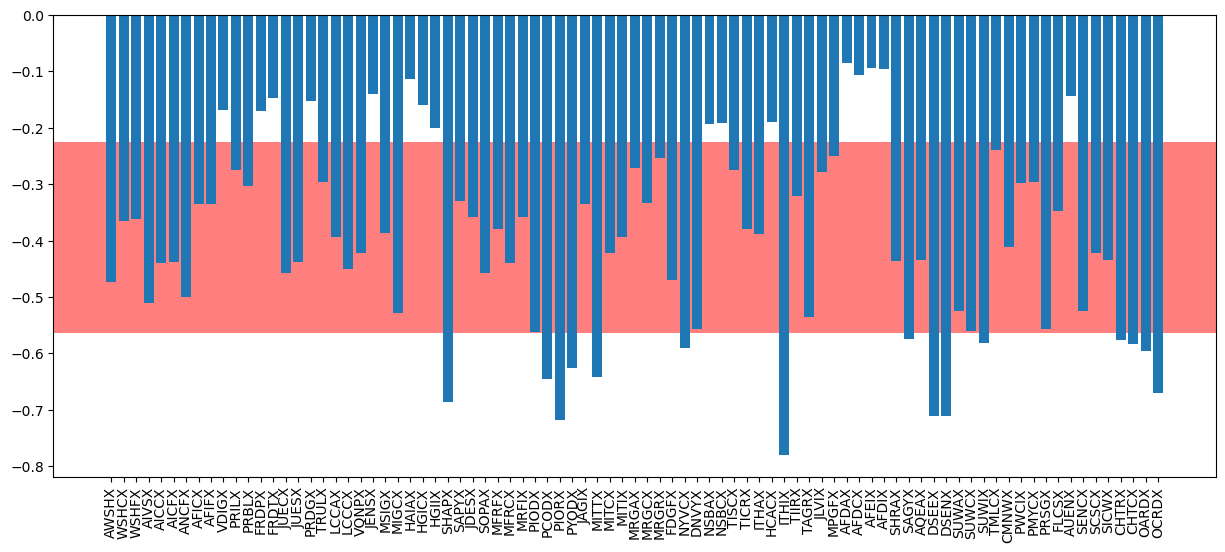

The largest alpha funds by CAPM marked to whole market are ['HAIAX', 'AFDCX', 'AFDIX', 'AFEIX', 'AFDAX'].  Note that the best one is last.
The mutual funds that are 1 stdev above mean with benchmark alpha are ['VDIGX', 'FRDPX', 'FRDTX', 'PRDGX', 'JENSX', 'HAIAX', 'HGICX', 'HGIIX', 'NSBAX', 'NSBCX', 'HCACX', 'AFDAX', 'AFDCX', 'AFEIX', 'AFDIX', 'AUENX']
The mutual funds that are 1 stdev below mean with benchmark alpha are ['SHAPX', 'PCODX', 'PIORX', 'PYODX', 'MITTX', 'NYVCX', 'ITHIX', 'SAGYX', 'DSEEX', 'DSENX', 'SUWIX', 'CHTRX', 'CHTCX', 'OARDX', 'OCRDX']
Average beta of below stdev alpha is 0.9736938594488289 with a stdev on beta of 0.09460205640928213
Average beta of above stdev alpha is 0.8842267730187563 with a stdev on beta of 0.08924164395402252


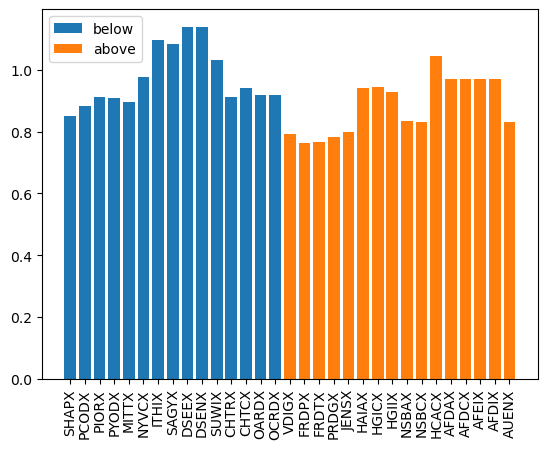

In [47]:
data_analyze_strat_base(1, 'Large Blend')


CAPM benchmark measurement


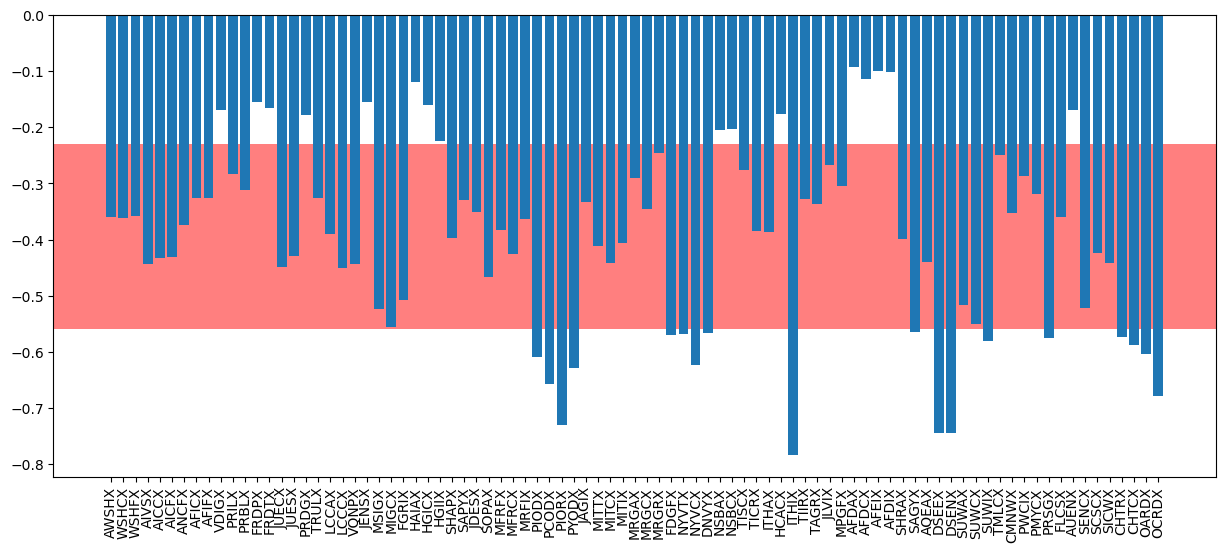

The largest alpha funds by CAPM marked to benchmask are ['HAIAX', 'AFDCX', 'AFDIX', 'AFEIX', 'AFDAX'].  Note last one is best one
The mutual funds that are 1 stdev above mean with benchmark alpha are ['VDIGX', 'FRDPX', 'FRDTX', 'PRDGX', 'JENSX', 'HAIAX', 'HGICX', 'HGIIX', 'NSBAX', 'NSBCX', 'HCACX', 'AFDAX', 'AFDCX', 'AFEIX', 'AFDIX', 'AUENX']
The mutual funds that are 1 stdev above mean with benchmark alpha are ['PIODX', 'PCODX', 'PIORX', 'PYODX', 'FDGFX', 'NYVTX', 'NYVCX', 'DNVYX', 'ITHIX', 'SAGYX', 'DSEEX', 'DSENX', 'SUWIX', 'PRSGX', 'CHTRX', 'CHTCX', 'OARDX', 'OCRDX']
Average beta of below stdev alpha is 1.001849274257947 with a stdev on beta of 0.07779820481188432
Average beta of above stdev alpha is 0.9037075077433944 with a stdev on beta of 0.08354947157114685


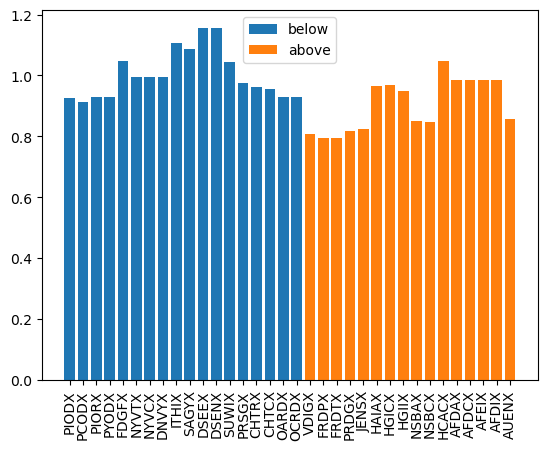

Average corr of below stdev alpha is 0.8704793125752089 with a stdev on corr of 0.027588970895616342
Average corr of above stdev alpha is 0.9210703242833704 with a stdev on corr of 0.09255267993211451


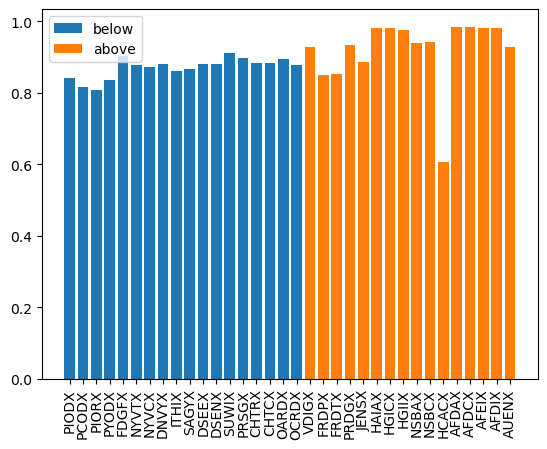

In [48]:
data_analyze_strat_bench(1, 'Large Blend')


5-factor measurement


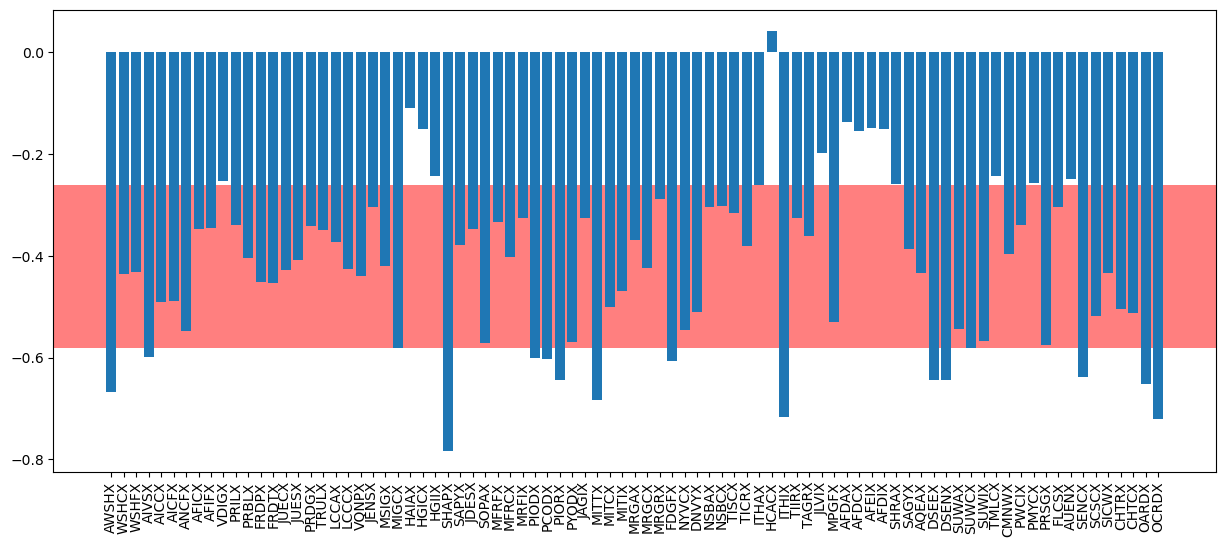

The largest alpha funds by 5-factor are ['AFDIX', 'AFEIX', 'AFDAX', 'HAIAX', 'HCACX'].  Note last one is best one
The mutual funds that are 1 stdev above mean with 5-factor alpha are ['VDIGX', 'HAIAX', 'HGICX', 'HGIIX', 'HCACX', 'JLVIX', 'AFDAX', 'AFDCX', 'AFEIX', 'AFDIX', 'SHRAX', 'TMLCX', 'PMYCX', 'AUENX']
The mutual funds that are 1 stdev above mean with 5-factor alpha are ['AWSHX', 'AIVSX', 'MIGCX', 'SHAPX', 'PIODX', 'PCODX', 'PIORX', 'MITTX', 'FDGFX', 'ITHIX', 'DSEEX', 'DSENX', 'SUWCX', 'SENCX', 'OARDX', 'OCRDX']
Average beta of below stdev alpha is 0.9710452706154282 with a stdev on beta of 0.07783725044277022
Average beta of above stdev alpha is 0.9826487550384781 with a stdev on beta of 0.06372798300043034


Average SMB of below stdev alpha is -0.10196379156701929 with a stdev on SMB of 0.06514000633866819
Average SMB of above stdev alpha is -0.0837286610133352 with a stdev on SMB of 0.12215228933492209


Average HML of below stdev alpha is 0.09966316272780681 with a stdev on H

In [49]:
data_analyze_strat_5(1, 'Large Blend')

In [50]:
us_eq_data.keys()

dict_keys(['Large Value', 'Large Blend', 'Large Growth', 'Mid-Cap Value', 'Mid-Cap Blend', 'Mid-Cap Growth', 'Small Value', 'Small Blend', 'Small Growth'])